# Implementing a Simple Genetic Algorithm

In this section, we'll start to look at a simple implementation of a Genetic Algorithm (GA). The intention of this notebook is to provide you with hands-on experience of the theoretical concepts we've covered and demonstrate how these algorithms work in practice.

We'll build a simple GA from scratch, step by step. Our goal is to create a flexible and understandable implementation that solves a basic optimization problem: maximizing the number of 1s in a binary string. While this problem is straightforward, the techniques we'll use can be adapted to more complex optimization scenarios.

Key components we'll implement:

1. Chromosome representation
2. Population initialization
3. Fitness evaluation
4. Selection mechanism
5. Genetic operators (crossover and mutation)
6. Main genetic algorithm loop

In this implementation, we'll use NumPy for efficient numerical operations and Matplotlib for visualizing our results. By the end of this section, you'll have a working genetic algorithm that you can run, observe, and modify. You'll see how the population evolves over generations and how the best solution improves over time.

Remember, while we're solving a simple problem, the structure and principles of this implementation can be adapted to a wide range of optimization tasks. The skills you learn here will form the foundation for understanding and developing more complex evolutionary algorithms.

Let's start by setting up our environment and then we'll define the basic chromosome structure.

## Setting up the environment

First, we'll import the necessary libraries and set up the basic structure for our genetic algorithm: NumPy for efficient numerical operations and Matplotlib for plotting our results.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Defining the chromosome structure

We start the implementation by creating a class to represent individual solutions (chromosomes) in our genetic algorithm. This class initializes a chromosome with a set of genes and a placeholder for fitness. The genes represent a potential solution, and fitness will be calculated later to determine how good this solution is. This is a very generic class that could be easily adapted to more specific needs, as we'll see later.

In [ ]:
class Chromosome:
    def __init__(self, genes):
        self.genes = genes
        self.fitness = None

## Creating an initial population

Next we need to generate a starting population of random solutions to begin the evolutionary process. This function creates a list of Chromosome objects. Each chromosome has a random binary string of genes of the specified length. The population size determines how many chromosomes are created.

In [ ]:
def initialize_population(pop_size, gene_length):
    return [Chromosome(np.random.randint(2, size=gene_length)) for _ in range(pop_size)]

## Implementing fitness evaluation

Define how to assess the quality of each solution in our population. This function calculates the fitness of a chromosome. In this simple example, fitness is determined by counting the number of 1s in the gene sequence. A higher count of 1s results in higher fitness.

In [ ]:
def evaluate_fitness(chromosome):
    # Example: maximize the number of 1s in the chromosome
    return np.sum(chromosome.genes)

## Designing selection mechanisms

Implement a method to choose which chromosomes will be used to create the next generation. This function performs tournament selection. It randomly selects a subgroup of chromosomes and returns the one with the highest fitness. This process favors fitter individuals but still gives less fit individuals a chance to be selected.

In [ ]:
def tournament_selection(population, tournament_size):
    tournament = np.random.choice(population, tournament_size, replace=False)
    return max(tournament, key=lambda x: x.fitness)

## Coding genetic operators

Implement crossover and mutation operations to create new solutions from existing ones. The crossover function creates two new chromosomes by combining genes from two parents at a random point. The mutation function flips individual genes with a probability equal to the mutation rate. These operations introduce variation into the population.

In [ ]:
def single_point_crossover(parent1, parent2):
    crossover_point = np.random.randint(1, len(parent1.genes))
    child1_genes = np.concatenate((parent1.genes[:crossover_point], parent2.genes[crossover_point:]))
    child2_genes = np.concatenate((parent2.genes[:crossover_point], parent1.genes[crossover_point:]))
    return Chromosome(child1_genes), Chromosome(child2_genes)

def mutation(chromosome, mutation_rate):
    for i in range(len(chromosome.genes)):
        if np.random.random() < mutation_rate:
            chromosome.genes[i] = 1 - chromosome.genes[i]

## Putting it all together: the main loop

Combine all components into a complete genetic algorithm that evolves solutions over multiple generations. This function runs the entire genetic algorithm. It initializes a population, then repeats the process of fitness evaluation, selection, crossover, and mutation for the specified number of generations. It also keeps track of the best fitness in each generation for later analysis.

In [ ]:
def genetic_algorithm(pop_size, gene_length, generations, tournament_size, mutation_rate):
    population = initialize_population(pop_size, gene_length)

    # Evaluate fitness
    for chromosome in population:
        chromosome.fitness = evaluate_fitness(chromosome)

    best_fitnesses = []

    for gen in range(generations):
        # Create new population
        new_population = []
        for _ in range(pop_size // 2):
            parent1 = tournament_selection(population, tournament_size)
            parent2 = tournament_selection(population, tournament_size)
            child1, child2 = single_point_crossover(parent1, parent2)
            mutation(child1, mutation_rate)
            mutation(child2, mutation_rate)
            new_population.extend([child1, child2])

        population = new_population

        # Evaluate fitness
        for chromosome in population:
            chromosome.fitness = evaluate_fitness(chromosome)

        # Store the best fitness of this generation
        best_fitnesses.append(max(chromosome.fitness for chromosome in population))

    return population, best_fitnesses

## Running the algorithm and plotting results

Execute the genetic algorithm and visualize how the best fitness changes over generations. This code runs the genetic algorithm with specified parameters, then plots the best fitness value for each generation. This allows us to visualize how the quality of solutions improves over time. Finally, it prints the best solution found and its fitness value.

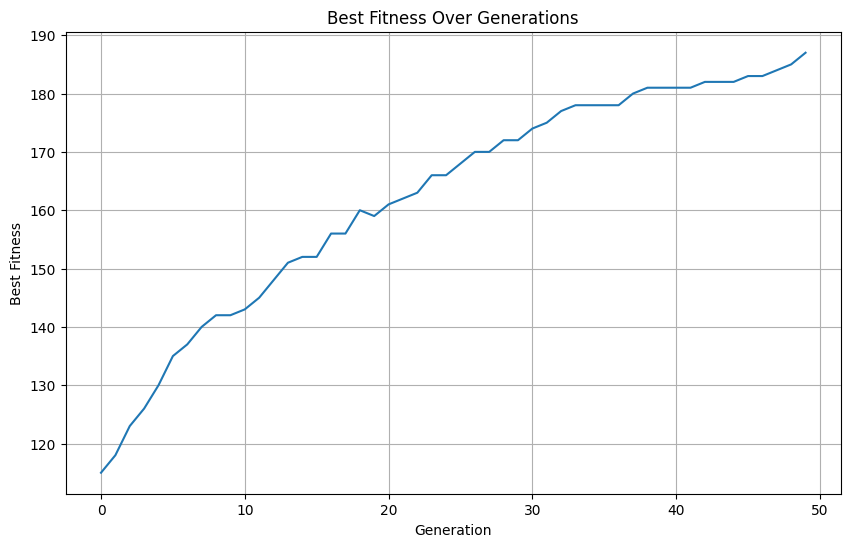

Best solution: [1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
Best fitness: 187


In [ ]:
# Run the genetic algorithm
pop_size = 100
gene_length = 200
generations = 50
tournament_size = 3
mutation_rate = 0.01

final_population, fitness_history = genetic_algorithm(pop_size, gene_length, generations, tournament_size, mutation_rate)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(generations), fitness_history)
plt.title('Best Fitness Over Generations')
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.grid(True)
plt.show()

# Print the best solution found
best_chromosome = max(final_population, key=lambda x: x.fitness)
print(f"Best solution: {best_chromosome.genes}")
print(f"Best fitness: {best_chromosome.fitness}")

# Developing an Interactive Genetic Algorithm

Interactive Art Generation using Genetic Algorithms (GAs) is an exciting application that combines computational creativity with user input. This approach allows us to explore the potential of GAs in creating visually appealing and diverse artistic outputs while incorporating human aesthetic preferences.

In this section, we'll implement a simple interactive system for evolving abstract art pieces. Our genetic algorithm will generate and evolve a population of artistic "chromosomes," each representing a unique piece of abstract art. The user will act as the fitness function, selecting preferred artworks to guide the evolutionary process.

Key concepts we'll cover:

1. Representing visual elements as chromosomes
2. Implementing custom genetic operators for artistic evolution
3. Creating an interactive interface for user-guided selection
4. Visualizing the evolving population of artworks

This case study demonstrates how GAs can be applied in creative domains and highlights the power of combining computational techniques with human creativity. It also serves as an excellent example of how the fitness function in a GA can be subjective and user-defined, rather than a fixed mathematical formula.

As we proceed, keep in mind that this is a simplified example. Real-world applications of evolutionary art can be much more complex, involving sophisticated representations, advanced rendering techniques, and more nuanced user interactions.

Let's begin by defining our artistic chromosome structure:

## Representing visual elements as chromosomes

Define a class to represent our artistic chromosomes, encoding visual elements like shape, color, and position. This class extends our basic `Chromosome` class. It interprets the gene sequence to define specific artistic attributes: shape parameters, color values, and position coordinates. This allows us to evolve these attributes through our genetic algorithm.

In [ ]:
class ArtChromosome(Chromosome):
    def __init__(self, genes):
        super().__init__(genes)
        self.shape = genes[:2]  # Shape parameters
        self.color = genes[2:5]  # RGB values
        self.position = genes[5:7]  # x, y coordinates

## Setting up the interactive environment

To import and set up the necessary libraries for creating an interactive genetic algorithm interface in a Jupyter notebook. This setup allows us to create widgets for user interaction and display outputs dynamically.

This code imports the `ipywidgets` library, which provides interactive HTML widgets for Jupyter notebooks. The `display` function from `IPython.display` is imported to show these widgets and other outputs in the notebook. These tools will allow us to create sliders, buttons, and other interactive elements for our genetic algorithm interface.

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import numpy as np

## Defining aesthetic fitness criteria

This demonstrates how genetic algorithms can incorporate subjective or human-guided fitness evaluation by creating an interactive interface that allows users to manually assign fitness values to chromosomes.

The `InteractiveArtEvolution` class below implements a method for users to evaluate the aesthetic appeal of generated art pieces by creating a set of sliders, one for each art piece in the population. Users can rate each piece from 0 to 10. When the "Submit Ratings" button is clicked, the fitness of each `ArtChromosome` is updated based on the user's ratings.

Each slider allows the user to assign a fitness value between 0 and 10 to a chromosome.

1. It first creates a list of `IntSlider` widgets, one for each chromosome.
2. These sliders are displayed vertically using a `VBox` widget.
3. A "Submit Fitness" button is created.
4. The `on_button_clicked` function is defined to update the fitness of each chromosome based on the slider values when the button is clicked.
5. The button is displayed and its click event is connected to the `on_button_clicked` function.

This setup allows users to interactively assign fitness values to chromosomes, simulating scenarios where fitness evaluation requires human judgment (like in art generation or design tasks).

In [ ]:
class InteractiveArtEvolution:
    def __init__(self, population_size, generations, mutation_rate):
        self.population_size = population_size
        self.generations = generations
        self.mutation_rate = mutation_rate
        self.population = [ArtChromosome(np.random.random(7)) for _ in range(population_size)]
        self.current_generation = 0

    def display_art(self, chromosome):
        fig, ax = plt.subplots()
        ax.add_patch(plt.Circle((chromosome.position[0], chromosome.position[1]),
                                chromosome.shape[0],
                                color=chromosome.color))
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        plt.show()

    def user_art_evaluation(self):
        clear_output(wait=True)
        print(f"Generation {self.current_generation + 1}")

        for i, chromosome in enumerate(self.population):
            print(f"Art Piece {i + 1}")
            self.display_art(chromosome)

        sliders = [widgets.IntSlider(min=0, max=10, description=f'Art {i + 1}:') for i in range(len(self.population))]
        display(widgets.VBox(sliders))

        def on_button_clicked(b):
            for art, slider in zip(self.population, sliders):
                art.fitness = slider.value
            self.evolve_population()

        button = widgets.Button(description="Submit Ratings")
        button.on_click(on_button_clicked)
        display(button)

    def evolve_population(self):
        if self.current_generation < self.generations - 1:
            # Selection
            parents = sorted(self.population, key=lambda x: x.fitness, reverse=True)[:2]

            # Create new population
            new_population = []
            for _ in range(self.population_size):
                if np.random.random() < 0.7:  # 70% chance of crossover
                    child = self.art_crossover(parents[0], parents[1])
                else:
                    child = ArtChromosome(np.random.random(7))  # New random art
                self.art_mutation(child)
                new_population.append(child)

            self.population = new_population
            self.current_generation += 1
            self.user_art_evaluation()
        else:
            self.finish_evolution()

    def art_crossover(self, parent1, parent2):
        crossover_point = np.random.randint(1, len(parent1.genes))
        child_genes = np.concatenate((parent1.genes[:crossover_point], parent2.genes[crossover_point:]))
        return ArtChromosome(child_genes)

    def art_mutation(self, chromosome):
        for i in range(len(chromosome.genes)):
            if np.random.random() < self.mutation_rate:
                chromosome.genes[i] = np.random.random()

    def finish_evolution(self):
        clear_output(wait=True)
        print("Evolution complete!")
        print("Final Art Pieces:")
        for i, chromosome in enumerate(self.population):
            print(f"Art Piece {i + 1}")
            self.display_art(chromosome)

    def start_evolution(self):
        self.user_art_evaluation()

## Running the Interactive Genetic Algorithm

Execute the interactive art evolution process and allow users to guide the evolution of art pieces. This code sets up the interactive evolution process:

1. It defines parameters for population size, number of generations, and mutation rate.
2. The run_interactive_evolution function is a wrapper that calls interactive_art_evolution with the defined parameters.
3. A "Start Evolution" button is created, which when clicked, begins the interactive evolution process.

This setup allows users to start the interactive evolution process with a single click, guiding the development of art pieces over multiple generations based on their aesthetic preferences.

In [ ]:
# Set up parameters and start the evolution
population_size = 6
generations = 10
mutation_rate = 0.1

evolution = InteractiveArtEvolution(population_size, generations, mutation_rate)

start_button = widgets.Button(description="Start Evolution")
start_button.on_click(lambda b: evolution.start_evolution())
display(start_button)

Button(description='Start Evolution', style=ButtonStyle())

## Homework Assignment

Attempt at least 3 extensions to the existing Interactive Genetic Algorithm. Describe in your notebook how you have extended the system. The following 5 extensions are suggestions for things that you may want to try, but you are also free to come up with some extensions of your own. Report on your experiments by submitting a notebook with the code for your experiments and comments on the things that you tried, what worked better than expected, what worked worse.

1. **Multi-shape Composition: Extend the ArtChromosome to represent multiple shapes instead of just one circle.**
- Modify the genes to encode information for 3-5 different shapes (circles, rectangles, triangles).
- Update the display_art method to render these multiple shapes.
- Adapt the crossover and mutation methods to handle the new chromosome structure.
- This will result in more complex and interesting visual compositions.

2. **Color Palette Evolution: Instead of evolving individual colors, evolve a color palette for each artwork.**
- Modify the ArtChromosome to include a set of 5-7 colors.
- Update the display_art method to use this palette in rendering shapes.
- Implement specialized crossover and mutation methods for color palettes.
- Consider using a color theory approach to evaluate the harmony of the palette.

3. **Simple Multi-objective Evaluation: Extend the evaluation process to consider multiple objectives using a weighted sum approach.**
- Add different aesthetic criteria (e.g., complexity, balance, use of space).
- Implement a multi-slider interface for users to rate each criterion separately.
- Use a weighted sum of the criteria to calculate overall fitness.
- Allow users to adjust the weights of different criteria.
- Visualize the trade-offs between different objectives.

4. **Adaptive Mutation Rate: Implement an adaptive mutation rate that changes based on population diversity.**
- Develop a method to measure population diversity.
- Adjust the mutation rate dynamically: increase it when diversity is low, decrease when diversity is high.
- Visualize the changing mutation rate alongside the evolving artworks.
- This will help maintain population diversity and prevent premature convergence.

5. **Interactive Fitness Landscape Visualization: Provide users with a visualization of the fitness landscape as it evolves.**
- Create a 2D or 3D representation of the current population's fitness.
- Update this visualization in real-time as the user provides ratings.
- Allow users to see how their choices are shaping the evolutionary trajectory.
- This will give users insight into the evolutionary process and how their choices affect it.

# Assignment 2
Volodymyr Kalinin, 3648214

# Extention 1
As asked in the instruction for extention 1, I have added 2 more shapes, for the genes to contain 3 shapes (triangles, rectagles, circles), and changed the dependant methods to also be able to represent multiple shapes. I added a new gene to the art chromosome, called shape_type_val, which sets the shape of the art in our "painting". I also updated the display_art method to render the new shapes, similarly to the circle one shown in the example, then changed the mutation and crossover methods to be applied to new shapes.

# Extention 2
I have added the color palette evolution extention. Similarly to extention 1, I have added the color palette genes (RGB components) and removed the individual shape gene responsible for color. I updated the display_art method to use the colors from the chromosomes palette. Changed mutantion and crossover methods to also apply them to the palette genes. Added color harmony evaluation to include it in the overall fitness, to encourage evolution towards harmonious palettes.

#Extention 3
I have implemented an adaptive mutation rate that changes based on population diversity. In order to do so, I added mutation rate parameters (initial, min, max_mutation_rate) and created a measure_diversity method to adjust the mutation rate dynamically, increasing it when diversity is low and decreasing it when diversity is high. Additionally, I have created a plot to visualize mutation rate changes by generations. It will appear after the first new generation has been initialized.

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import numpy as np

class Chromosome:
    def __init__(self, genes):
        self.genes = genes
        self.fitness = 0

class ArtChromosome(Chromosome):
    num_shapes = 3
    genes_per_shape = 6
    palette_size = 5
    genes_per_color = 3
    total_genes = num_shapes * genes_per_shape + palette_size * genes_per_color

    def __init__(self, genes):
        super().__init__(genes)
        self.palette = []
        palette_genes_start = self.num_shapes * self.genes_per_shape
        for i in range(self.palette_size):
            color_genes = genes[palette_genes_start + i*self.genes_per_color : palette_genes_start + (i+1)*self.genes_per_color]
            color = np.clip(color_genes, 0, 1)
            self.palette.append(color)
        self.shapes = []
        for i in range(self.num_shapes):
            shape_genes = genes[i*self.genes_per_shape : (i+1)*self.genes_per_shape]
            shape_type_val = shape_genes[0]
            if shape_type_val < 0.33:
                shape_type = 'circle'
            elif shape_type_val < 0.66:
                shape_type = 'rectangle'
            else:
                shape_type = 'triangle'
            size_params = shape_genes[1:3]
            position = shape_genes[3:5]
            color_index = int(shape_genes[5] * self.palette_size) % self.palette_size
            self.shapes.append({
                'type': shape_type,
                'size_params': size_params,
                'position': position,
                'color_index': color_index
            })

class InteractiveArtEvolution:
    def __init__(self, population_size, generations, initial_mutation_rate, min_mutation_rate=0.01, max_mutation_rate=0.2):
        self.population_size = population_size
        self.generations = generations
        self.initial_mutation_rate = initial_mutation_rate
        self.mutation_rate = initial_mutation_rate
        self.min_mutation_rate = min_mutation_rate
        self.max_mutation_rate = max_mutation_rate
        self.population = [ArtChromosome(np.random.random(ArtChromosome.total_genes)) for _ in range(population_size)]
        self.current_generation = 0
        self.mutation_rates = []

    def display_art(self, chromosome):
        fig, ax = plt.subplots()
        for shape in chromosome.shapes:
            shape_type = shape['type']
            size_params = shape['size_params']
            position = shape['position']
            color = chromosome.palette[shape['color_index']]
            # Change the size_coefficient between 0 and 1 to change the size of shapes
            size_coefficient = 0.7
            if shape_type == 'circle':
                radius = size_params[0] * size_coefficient
                circle = plt.Circle((position[0], position[1]), radius, color=color)
                ax.add_patch(circle)
            elif shape_type == 'rectangle':
                width = size_params[0] * size_coefficient
                height = size_params[1] * size_coefficient
                rectangle = plt.Rectangle((position[0], position[1]), width, height, color=color)
                ax.add_patch(rectangle)
            elif shape_type == 'triangle':
                size = size_params[0] * size_coefficient
                x = position[0]
                y = position[1]
                triangle = plt.Polygon([
                    (x, y),
                    (x + size, y),
                    (x + size/2, y + np.sqrt(3)*size/2)
                ], color=color)
                ax.add_patch(triangle)
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        plt.show()

    def user_art_evaluation(self):
        clear_output(wait=True)
        print(f"Generation {self.current_generation + 1}")
        print(f"Current Mutation Rate: {self.mutation_rate:.4f}")

        for i, chromosome in enumerate(self.population):
            print(f"Art Piece {i + 1}")
            self.display_art(chromosome)

        sliders = [widgets.IntSlider(min=0, max=10, description=f'Art {i + 1}:') for i in range(len(self.population))]
        display(widgets.VBox(sliders))

        def on_button_clicked(b):
            for art, slider in zip(self.population, sliders):
                art.fitness = slider.value + self.evaluate_color_harmony(art)
            self.evolve_population()

        button = widgets.Button(description="Submit Ratings")
        button.on_click(on_button_clicked)
        display(button)

        if self.mutation_rates:
            self.plot_mutation_rate()

    def evaluate_color_harmony(self, chromosome):
        colors = np.array(chromosome.palette)
        variance = np.var(colors)
        harmony_score = (1 - variance) * 2
        return harmony_score

    def measure_diversity(self):
        gene_array = np.array([chromosome.genes for chromosome in self.population])
        pairwise_differences = []
        for i in range(len(gene_array)):
            for j in range(i+1, len(gene_array)):
                diff = np.mean(np.abs(gene_array[i] - gene_array[j]))
                pairwise_differences.append(diff)
        average_difference = np.mean(pairwise_differences)
        return average_difference

    def adjust_mutation_rate(self):
        diversity = self.measure_diversity()
        max_possible_diversity = 1.0
        normalized_diversity = diversity / max_possible_diversity
        self.mutation_rate = self.max_mutation_rate * (1 - normalized_diversity) + self.min_mutation_rate * normalized_diversity
        self.mutation_rate = np.clip(self.mutation_rate, self.min_mutation_rate, self.max_mutation_rate)
        self.mutation_rates.append(self.mutation_rate)

    def evolve_population(self):
        if self.current_generation < self.generations - 1:
            parents = sorted(self.population, key=lambda x: x.fitness, reverse=True)[:2]
            new_population = []
            for _ in range(self.population_size):
                if np.random.random() < 0.7:
                    child = self.art_crossover(parents[0], parents[1])
                else:
                    child = ArtChromosome(np.random.random(ArtChromosome.total_genes))
                self.art_mutation(child)
                new_population.append(child)

            self.population = new_population
            self.current_generation += 1

            self.adjust_mutation_rate()

            self.user_art_evaluation()
        else:
            self.finish_evolution()

    def art_crossover(self, parent1, parent2):
        crossover_point_shapes = np.random.randint(1, parent1.num_shapes * parent1.genes_per_shape)
        child_genes_shapes = np.concatenate((
            parent1.genes[:crossover_point_shapes],
            parent2.genes[crossover_point_shapes:parent1.num_shapes * parent1.genes_per_shape]
        ))
        crossover_point_palette = np.random.randint(1, parent1.palette_size * parent1.genes_per_color)
        palette_start = parent1.num_shapes * parent1.genes_per_shape
        child_genes_palette = np.concatenate((
            parent1.genes[palette_start : palette_start + crossover_point_palette],
            parent2.genes[palette_start + crossover_point_palette :]
        ))
        child_genes = np.concatenate((child_genes_shapes, child_genes_palette))
        return ArtChromosome(child_genes)

    def art_mutation(self, chromosome):
        for i in range(chromosome.num_shapes * chromosome.genes_per_shape):
            if np.random.random() < self.mutation_rate:
                chromosome.genes[i] = np.random.random()
        for i in range(chromosome.num_shapes * chromosome.genes_per_shape, len(chromosome.genes)):
            if np.random.random() < self.mutation_rate:
                chromosome.genes[i] = np.random.random()

    def finish_evolution(self):
        clear_output(wait=True)
        print("Evolution complete!")
        print("Final Art Pieces:")
        for i, chromosome in enumerate(self.population):
            print(f"Art Piece {i + 1}")
            self.display_art(chromosome)
        self.plot_mutation_rate()

    def plot_mutation_rate(self):
        plt.figure()
        plt.plot(range(1, len(self.mutation_rates) + 1), self.mutation_rates, marker='o')
        plt.title('Mutation Rate Over Generations')
        plt.xlabel('Generation')
        plt.ylabel('Mutation Rate')
        plt.xticks(range(1, len(self.mutation_rates) + 1))
        plt.grid(True)
        plt.show()

    def start_evolution(self):
        self.user_art_evaluation()


Generation 3
Current Mutation Rate: 0.1509
Art Piece 1


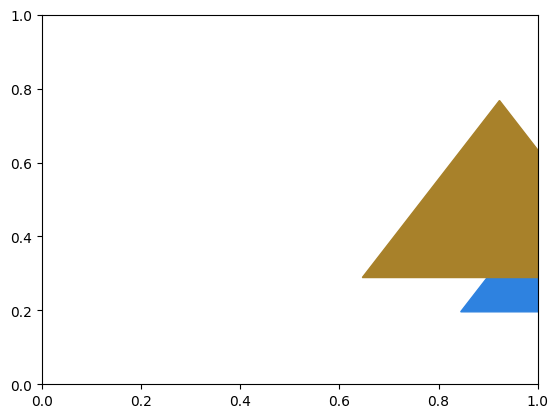

Art Piece 2


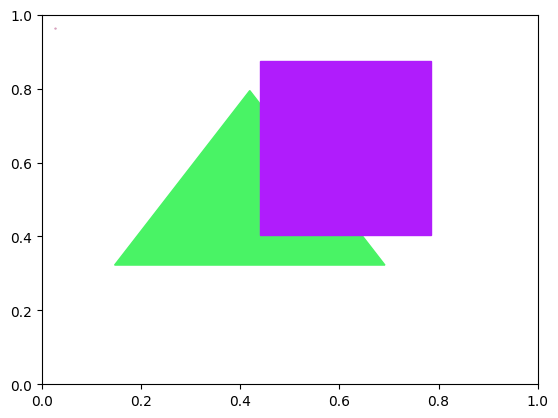

Art Piece 3


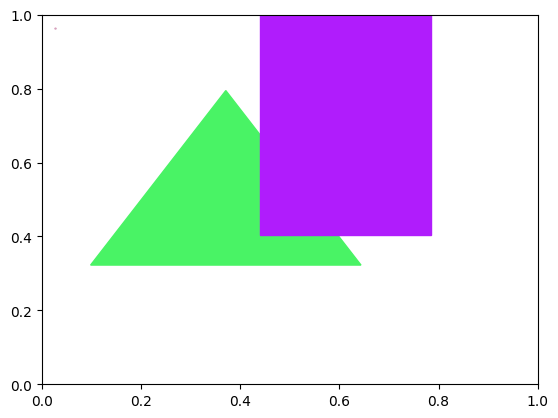

Art Piece 4


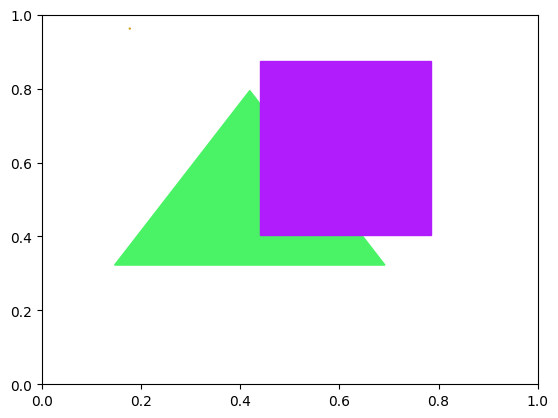

Art Piece 5


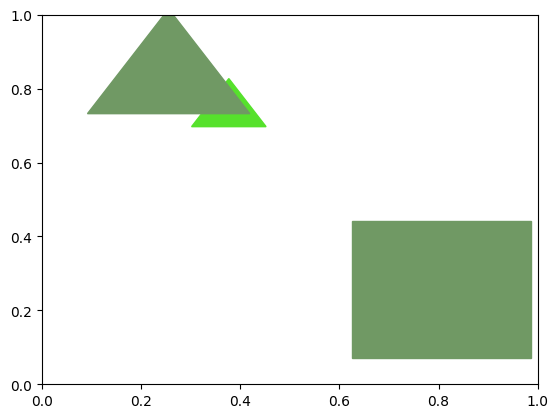

Button(description='Submit Ratings', style=ButtonStyle())

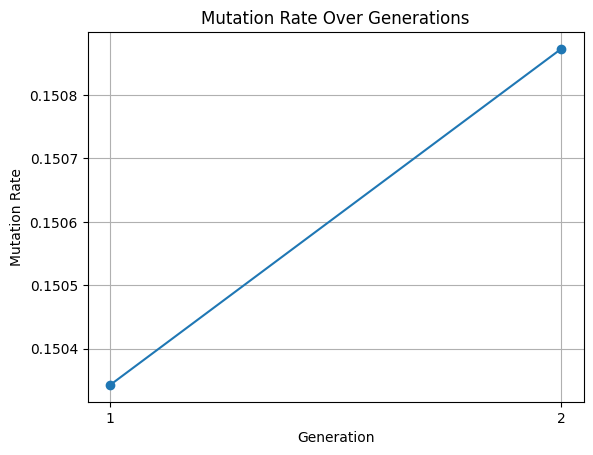

In [ ]:
population_size = 5
generations = 10
initial_mutation_rate = 0.2
evolution = InteractiveArtEvolution(population_size, generations, initial_mutation_rate)

start_button = widgets.Button(description="Start Evolution")
start_button.on_click(lambda b: evolution.start_evolution())
display(start_button)